In [232]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta

In [222]:
sns.set_theme()
sns.set_style("dark")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook") #, font_scale=2.5, rc={"lines.linewidth": 2.5})

In [223]:
rng = np.random.default_rng(1)

In [224]:
arr  = np.concatenate([rng.uniform(0.65, 1, 20), rng.uniform(0.3, 0.75, 30)])
rng.shuffle(arr)


In [225]:
s = """ 0.1 0.4 0.1 0.1 0.1 0.1 0.1 0.1 0.1 1.0 0.1 0.3 0.1 0.1 0.2 0.3 0.1 0.1 0.1 1.0 0.1 0.5 0.5
  0.1 0.1 0.1 0.1 0.1 0.3 1.0 0.1 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1 1.0 0.2 0.5 0.1 0.5 0.1 0.1
  0.1 0.3 0.1 1.0 0.1 0.1 0.1 0.1 0.1 0.3 0.1 0.1 0.1 1.0 0.1 0.1 0.1 0.2 0.1 0.1 0.4 0.5 0.4
  1.0 0.5 0.1 0.1 0.1 0.1 0.1 0.4 0.1 0.1 1.0 0.1 0.5 0.1 0.1 0.4 0.1 0.1 0.1 0.1 1.0 0.1 0.1
  0.1 0.1 0.1 0.1 0.1 0.2 0.4 1.0"""

In [226]:
arr = [float(d) for d in s.split()]

In [ ]:
df = pd.DataFrame({"x":np.arange(100), "y":arr})
df["y"][df["y"] < 0.99] = df["y"][df["y"] < 0.99] + rng.uniform(0, 0.10, 90)
df["y"][df["y"] > 0.99] = df["y"][df["y"] > 0.99] - rng.uniform(0, 0.15, 10)
df["clus"] = df["x"].apply(lambda n: str(n)[-1] == "9")
df["hpm"] = df["y"] > 0.5

<AxesSubplot:xlabel='y', ylabel='Density'>

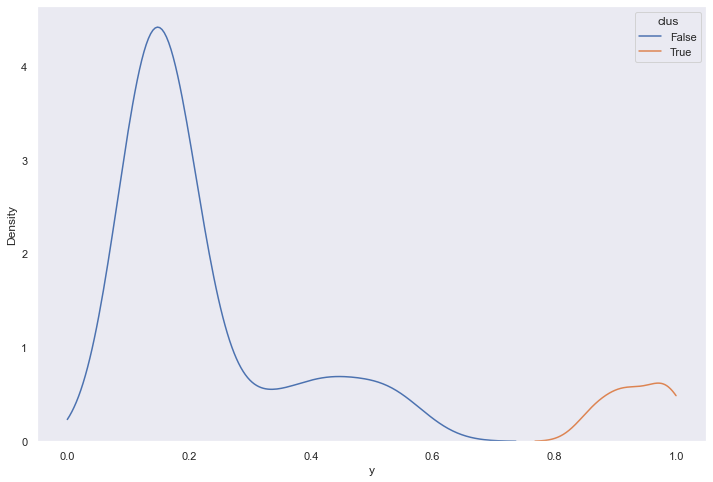

In [322]:
#sns.displot(data = df, x = "y", hue = "clus", rug = True, kind="kde")
#sns.displot(data = df, x = "y", hue = "clus",kde=True)
plt.figure(figsize=(12, 8))
ax = plt.gca() 
sns.kdeplot(data = df, x = "y", ax=ax,hue ="clus",  clip= (0,1))

No handles with labels found to put in legend.


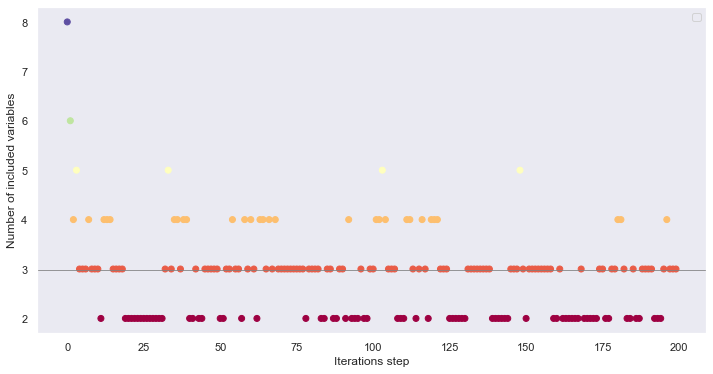

In [369]:
plt.figure(figsize=(12, 6))
#mk, _, _ = plt.stem(df["Number of included variables"], basefmt = 'w', linefmt = "w", markerfmt='D')
mk.set_markerfacecolor('none')
mk.set_markeredgecolor('none')
ax = plt.gca()
ax.scatter(x = df["x"], y = df["Number of included variables"]+0.01, c = df["Number of included variables"], cmap="Spectral")
ax.legend()
ax.axhline(y= 3, color='grey', linewidth=0.8)
ax.set_ylabel('Number of included variables')
ax.set_xlabel('Iterations step')
plt.show() 

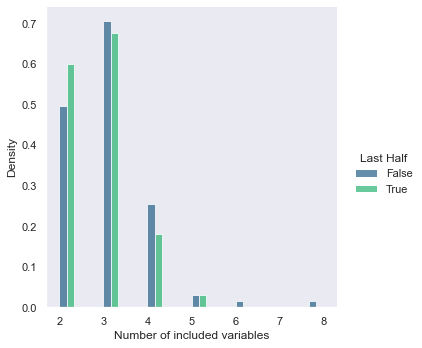

In [365]:
sns.displot(data = df, x = "Number of included variables", hue = "Last Half", stat = "density", multiple = "dodge", 
palette = "viridis")

No handles with labels found to put in legend.


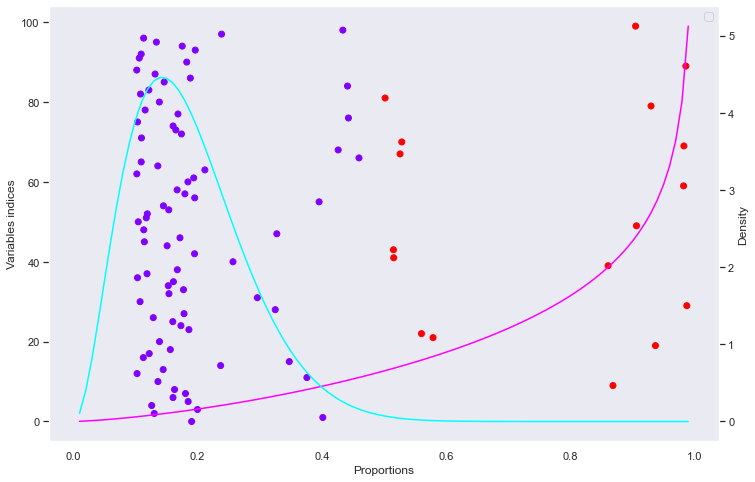

In [310]:
sns.set_style("dark")
plt.figure(figsize=(12, 8))
#mk, _, _ = plt.stem(df["y"], basefmt = 'w', linefmt = "grey", markerfmt='D', orientation = "horizontal") 
#mk.set_markerfacecolor('none')
#mk.set_markeredgecolor('none')
ax = plt.gca()
ax.scatter(y = df["x"], x = df["y"], c = df["hpm"], cmap="rainbow") # cmap="cool"
ax2 = ax.twinx()
ax2.plot(x, beta.pdf(x, a0, b0), color = "magenta")
ax2.plot(x, beta.pdf(x, a1, b1), color = "cyan")
ax.legend() 
#ax.axhline(y= 0.5, color='grey', linewidth=0.8)
ax.set_xlabel('Proportions')
ax.set_ylabel('Variables indices')
ax2.set_ylabel('Density') 
plt.show() 

In [231]:
def var(x):
    m = x.mean()
    return ((x - m)**2).sum()/(x.size - 1)
def alphaf(x):
    m = x.mean(); v = x.var()
    assert(v < m*(1-m))
    return m*(m*(1-m)/v - 1)
def betaf(x):
    m = x.mean(); v = x.var()
    assert(v < m*(1-m))
    return (1-m)*(m*(1-m)/v - 1)


In [306]:
a0 , b0 = alphaf(df["y"][df["clus"]]), betaf(df["y"][df["clus"]])
a1 , b1 = alphaf(df["y"][~df["clus"]]), betaf(df["y"][~df["clus"]])
np.log(beta.pdf(df["y"][df["clus"]], a0,b0)).mean() , np.log(beta.pdf(df["y"][~df["clus"]], a1,b1)).mean()

(1.7827318768541722, 0.798975255557013)

In [309]:
a0 , b0 = alphaf(df["y"][df["hpm"]]), betaf(df["y"][df["hpm"]])
a1 , b1 = alphaf(df["y"][~df["hpm"]]), betaf(df["y"][~df["hpm"]])
np.log(beta.pdf(df["y"][df["hpm"]], a0,b0)).mean() , np.log(beta.pdf(df["y"][~df["hpm"]], a1,b1)).mean()

(0.5299951844579212, 1.111765916921254)

In [334]:
s = "1.000 1.000 0.120 0.025 0.475 0.005 0.080 0.135".split()
arr = [float(x) for x in s]
df = pd.DataFrame({"x":np.arange(8), "y":arr})
df["clus"] = df["y"] > 0.4
df["hpm"] = df["y"] > 0.5

In [328]:
s

['1.000', '1.000', '0.120', '0.025', '0.495', '0.005', '0.080', '0.135']

In [362]:
s = """ 1.000 0.750 0.500 0.625 0.375 0.375 0.375 0.500 0.375 0.375 0.375 0.250 0.500 0.500 0.500
  0.375 0.375 0.375 0.375 0.250 0.250 0.250 0.250 0.250 0.250 0.250 0.250 0.250 0.250 0.250
  0.250 0.250 0.375 0.625 0.375 0.500 0.500 0.375 0.500 0.500 0.250 0.250 0.375 0.250 0.250
  0.375 0.375 0.375 0.375 0.375 0.250 0.250 0.375 0.375 0.500 0.375 0.375 0.250 0.500 0.375
  0.500 0.375 0.250 0.500 0.500 0.375 0.500 0.375 0.500 0.375 0.375 0.375 0.375 0.375 0.375
  0.375 0.375 0.375 0.250 0.375 0.375 0.375 0.375 0.250 0.250 0.375 0.375 0.250 0.250 0.375
  0.375 0.250 0.500 0.250 0.250 0.250 0.375 0.250 0.250 0.375 0.375 0.500 0.500 0.625 0.500
  0.375 0.375 0.375 0.250 0.250 0.250 0.500 0.500 0.375 0.250 0.375 0.500 0.375 0.250 0.500
  0.500 0.500 0.375 0.375 0.375 0.250 0.250 0.250 0.250 0.250 0.250 0.375 0.375 0.375 0.375
  0.375 0.375 0.375 0.375 0.250 0.250 0.250 0.250 0.250 0.250 0.375 0.375 0.375 0.625 0.375
  0.250 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.250 0.250 0.375 0.250 0.250 0.250
  0.250 0.250 0.250 0.375 0.250 0.250 0.250 0.250 0.250 0.375 0.375 0.250 0.250 0.375 0.375
  0.500 0.500 0.375 0.250 0.250 0.375 0.250 0.250 0.375 0.375 0.375 0.375 0.250 0.250 0.250
  0.375 0.500 0.375 0.375 0.375 """.split()
arr = [float(x)*8 for x in s]
df = pd.DataFrame({"x":np.arange(len(arr)), "Number of included variables":arr})
df["Last Half"] = df["x"] > 100
#df["hpm"] = df["y"] > 0.5